In [1]:
from notebook_utils.data_generation import *
from pycss.model_selection import *
from matplotlib import pyplot as plt
import numpy as np
import scipy 

In [2]:
def compute_test_stat(Sigma, S, n):
    p = Sigma.shape[0]
    Sigma_R = regress_off(Sigma, S)
    S_comp = complement(p, S)
    test_stat = n*(np.sum(np.log(np.diag(Sigma_R)[S_comp])) - np.linalg.slogdet(Sigma_R[S_comp, :][:, S_comp])[1])
    return test_stat

def plot_quantiles(arrs, labels):
    for i in range(len(arrs)):
        qs = np.arange(0.01, 1, step=0.01)
        quantiles = np.quantile(arrs[i], qs)
        plt.plot(qs, quantiles, label=labels[i], alpha=0.5)
    plt.legend()


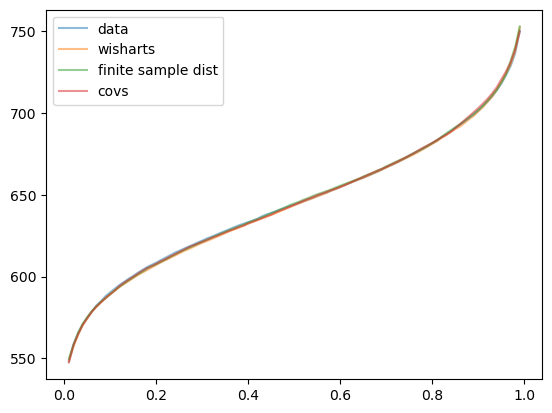

In [3]:
n, p, k = 10, 5, 20

W = np.ones((p-k, k))
D = np.ones(p-k)
C_chol = np.eye(k)

B=int(1e4)
bins=50
chi_square_limit = np.random.chisquare(1, size=B)
finite_sample_dist = sample_null_dist(n, p, k, B=B)


X_S = np.random.normal(0, 1, (B, n, k))
X = generate_PCSS_data(X_S, W=W, D=D)
X_c = X - np.mean(X, axis=1)[:, np.newaxis, :]  
Sigma_hats = 1/n * np.transpose(X_c, (0, 2, 1) ) @ X_c
test_stat_data = [compute_test_stat(Sigma_hat, np.arange(k), n) for Sigma_hat in Sigma_hats]


Sigma_hats = generate_gaussian_PCSS_sample_cov(n, C_chol=C_chol, W=W, D =D, B=B)
test_stat_covs = [compute_test_stat(Sigma_hat, np.arange(k), n) for Sigma_hat in Sigma_hats]

wisharts = scipy.stats.wishart(df=n-k-1, scale=np.eye(p-k)).rvs(size=B)
test_stat_wisharts = [n*(np.sum(np.log(np.diag(wishart))) - np.log(np.linalg.det(wishart))) for wishart in wisharts]

plot_quantiles([test_stat_data, test_stat_wisharts, finite_sample_dist, test_stat_covs], ['data', 'wisharts', 'finite sample dist', 'covs'])